## Pt 1 - Thefuzz

In [18]:
# imports 
import pandas as pd
from thefuzz import process

# load data
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/Motor_Vehicle_Collisions_-_Crashes_20251208.csv'
df = pd.read_csv(path)


In [19]:
def detect_electric(raw): # function to detect electric vehicles
    if not isinstance(raw, str): # if the input is not a string, return None
        return None
    s = raw.lower() # convert to lowercase for easier matching

    if any(k in s for k in ["e-bike", "ebike", "e bike"]):
        return "Electric Bike"
    if any(k in s for k in ["e-scooter", "escooter", "e scooter"]):
        return "Electric Scooter"
    if any(k in s for k in ["electric m", "e-motor", "e motor", "e motorcycle"]):
        return "Electric Motorcycle"
    if any(k in s for k in ["one wheel", "hoverboard", "ninebot", "unicycle"]):
        return "Electric Unicycle / One-Wheel"
    if "electric" in s or "e-" in s:
        return "Electric Other"

    return None # leaves as None if no electric keywords found


In [20]:
vehicle_cols = ['VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3',
                'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']


unique_vehicles = pd.unique(df[vehicle_cols].values.ravel()) # makes 1-dimensional and only takes each value once

unique_vehicles = sorted([v for v in unique_vehicles if pd.notna(v)]) # sorted list without missing values

unique_vehicles # displays all unique vehicle types in the dataset. helps to preview before making categories

['-',
 '.',
 '0',
 '000',
 '0000',
 '09',
 '10 Paaseng',
 '100th truc',
 '12 PASSENG',
 '13',
 '16m',
 '17',
 '18 WHEELER',
 '18 wheeler',
 '2',
 '2 dr sedan',
 '2 wheel sc',
 '263',
 '2YDSWHEELL',
 '3 Wheel Sc',
 '3 Wheel Ve',
 '3-Door',
 '325FLCR',
 '340AJ',
 '4',
 '4 dr sedan',
 '4 wheeler',
 '4door',
 '4dsd',
 '5',
 '50CC SCOOT',
 '50cc mini',
 '7',
 '787',
 '997',
 '999',
 'A',
 'A bulance',
 'A,n',
 'ABMU',
 'ABULANCE',
 'ACCESS A R',
 'ACCESS RID',
 'ACCESS-ARI',
 'ACUR',
 'ALL TERRAI',
 'AMAZON TRU',
 'AMAZON VAN',
 'AMB',
 'AMBALANCE',
 'AMBLUANCE',
 'AMBU',
 'AMBULACE',
 'AMBULANCE',
 'AMBULANCE`',
 'AMBULANE',
 'AMBULANVE',
 'AMBULENCE',
 'AMBULETTE',
 'AMSGC',
 'AMULANCE',
 'APP',
 'APPORTIONE',
 'ARCIMOTO',
 'ARMORED TR',
 'ASPHALT RO',
 'ATTECHMENT',
 'AUTOTRLR T',
 'Access A R',
 'Access a R',
 'Access-A-R',
 'All-Terrain Vehicle',
 'Amazon Van',
 'Amazon del',
 'Amazon tru',
 'Amazon van',
 'Amb',
 'Ambu',
 'Ambulance',
 'Ambulances',
 'Ambulence',
 'Ambulette',
 'Appor

In [21]:
motor_categories = [ # list of motor vehicle categories to fuzzymatch
    "Sedan", "SUV", "Taxi", "Pickup Truck", "Van", "Truck", "Bus",
    "Motorcycle", "Moped", "Scooter", "Ambulance", "Fire Truck",
    "Garbage Truck", "Delivery Truck", "Forklift / Construction",
    "Trailer", "Government Vehicle", "Commercial Vehicle", "Unknown"
]


In [22]:
def fuzzy_motor_class(raw): # function to match motor catagories
    if not isinstance(raw, str): # if the input is not a string, return Unknown
        return "Unknown"
    clean = raw.strip() # remove leading and trailing whitespace

    match, score = process.extractOne(clean, motor_categories) # returns motor catagory if match score is high enough

    
    return match if score >= 70 else "Unknown" # adjust threshold depending on how wild the data is


In [23]:
def classify_vehicle(raw): # applies functions to dataframe
    electric = detect_electric(raw) # skips fuzzy matching if electric is detected
    if electric is not None: 
        return electric # means the vehicle is electric
    return fuzzy_motor_class(raw) # otherwise, applies fuzzy matching


In [24]:
df['VEHICLES COMBINED'] = df[vehicle_cols].fillna('').agg(' | '.join, axis=1) 
# fills missing values with an empty space, then combines vehicle type columns into one string per row. makes it easier to run fuzzy matching
#  or electric detection on all vehicles in the crash at once, instead of checking each column individually. **IMPORTANT** technically losing data because it puts
# all vehicle types into one string, but for this analysis it's acceptable(Note as constraint).

df["VEHICLE CLEAN"] = df["VEHICLES COMBINED"].apply(lambda x: classify_vehicle(x)) # applies fuzzy matching and electric detection to the combined vehicle types



Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  |  |  |']
Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '|  | 

In [25]:
df["VEHICLE CLEAN"] = df["VEHICLE CLEAN"] # jupyter kept forgetting what was in this column so i just redefined it

In [26]:
df["VEHICLE CLEAN"].value_counts()

VEHICLE CLEAN
Sedan                            154019
Government Vehicle               149494
Pickup Truck                      14175
Unknown                           13562
Electric Bike                      8202
Taxi                               6725
Truck                              5966
Electric Scooter                   5021
Motorcycle                         3976
Bus                                2412
Ambulance                          1619
Van                                1497
Moped                              1377
Garbage Truck                       806
Scooter                             497
Fire Truck                          149
Delivery Truck                      136
Trailer                             119
SUV                                  93
Forklift / Construction              56
Electric Other                       37
Commercial Vehicle                   33
Electric Motorcycle                  19
Electric Unicycle / One-Wheel        11
Name: count, dtype: int64

In [27]:
electric_categories = [
    "Electric Bike",
    "Electric Scooter",
    "Electric Motorcycle",
    "Electric Unicycle / One-Wheel",
    "Electric Other"
]


df["is_electric"] = df["VEHICLE CLEAN"].apply(lambda x: 1 if x in electric_categories else 0)


print(df["is_electric"].value_counts())
print(f'\n',df["is_electric"].value_counts(normalize=True))

is_electric
0    356711
1     13290
Name: count, dtype: int64

 is_electric
0    0.964081
1    0.035919
Name: proportion, dtype: float64


In [28]:
# crashes with at least one electric vehicle
electric_crashes = df[df["is_electric"] == 1]

# total injured and killed
total_injured = electric_crashes["NUMBER OF PERSONS INJURED"].sum()
total_killed = electric_crashes["NUMBER OF PERSONS KILLED"].sum()

# crashes where no one was injured or killed
no_injury_crashes = electric_crashes[
    (electric_crashes["NUMBER OF PERSONS INJURED"] == 0) &
    (electric_crashes["NUMBER OF PERSONS KILLED"] == 0)]

total_no_injury_crashes = no_injury_crashes.shape[0]

print(f"Total persons injured in electric vehicle crashes: {total_injured}")
print(f"Total persons killed in electric vehicle crashes: {total_killed}")
print(f"Number of electric vehicle crashes with no injury or death: {total_no_injury_crashes}")

# in case i get confused again,  this total number of people involved in crashes, unlike is_electric which is total number of crashes with electric vehicles


Total persons injured in electric vehicle crashes: 11889
Total persons killed in electric vehicle crashes: 93
Number of electric vehicle crashes with no injury or death: 2195


## Pt 2 Time

/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_41224/1221899107.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_injuries.index, y=season_injuries.values, palette='viridis')


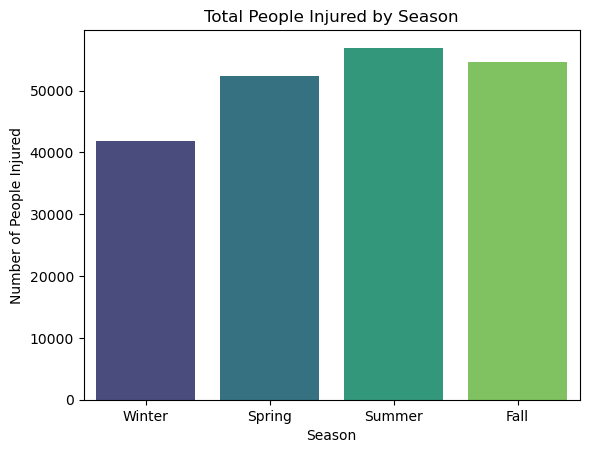

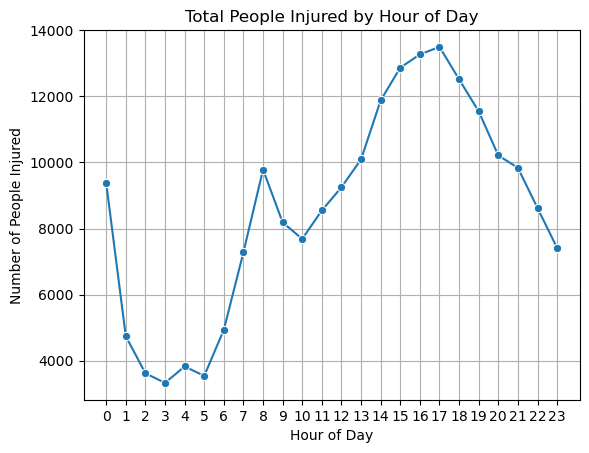

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['CRASH DATE'].dt.month.apply(get_season)


season_injuries = df.groupby('Season')['NUMBER OF PERSONS INJURED'].sum().reindex(['Winter','Spring','Summer','Fall'])



sns.barplot(x=season_injuries.index, y=season_injuries.values, palette='viridis')
plt.title('Total People Injured by Season')
plt.ylabel('Number of People Injured')
plt.xlabel('Season')
plt.show()


hour_injuries = df.groupby('CRASH TIME')['NUMBER OF PERSONS INJURED'].sum()



sns.lineplot(x=hour_injuries.index, y=hour_injuries.values, marker='o')
plt.title('Total People Injured by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of People Injured')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

## Pt 3 - Factors


In [30]:
import pandas as pd
from thefuzz import process

df = pd.read_csv(path)

list1 = df['CONTRIBUTING FACTOR VEHICLE 1'].tolist()
list2 = df['CONTRIBUTING FACTOR VEHICLE 2'].tolist()
list3 = df['CONTRIBUTING FACTOR VEHICLE 3'].tolist()
list4 = df['CONTRIBUTING FACTOR VEHICLE 4'].tolist()
list5 = df['CONTRIBUTING FACTOR VEHICLE 5'].tolist()

list6 = list1 + list2 + list3 + list4 + list5

unique_factors = set([factor for factor in list6 if isinstance(factor, str)])
unique_factors

{'Accelerator Defective',
 'Aggressive Driving/Road Rage',
 'Alcohol Involvement',
 'Animals Action',
 'Backing Unsafely',
 'Brakes Defective',
 'Cell Phone (hand-Held)',
 'Cell Phone (hands-free)',
 'Driver Inattention/Distraction',
 'Driver Inexperience',
 'Driverless/Runaway Vehicle',
 'Drugs (illegal)',
 'Eating or Drinking',
 'Failure to Keep Right',
 'Failure to Yield Right-of-Way',
 'Fatigued/Drowsy',
 'Fell Asleep',
 'Following Too Closely',
 'Glare',
 'Headlights Defective',
 'Illnes',
 'Lane Marking Improper/Inadequate',
 'Listening/Using Headphones',
 'Lost Consciousness',
 'Obstruction/Debris',
 'Other Electronic Device',
 'Other Lighting Defects',
 'Other Vehicular',
 'Outside Car Distraction',
 'Oversized Vehicle',
 'Passenger Distraction',
 'Passing Too Closely',
 'Passing or Lane Usage Improper',
 'Pavement Defective',
 'Pavement Slippery',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Physical Disability',
 'Prescription Medication',
 'Reaction to Uninvol

In [31]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')